# Introduction
Natural Language Processing (NLP) is a branch of artificial intelligence associated with enabling computers or machines to understand human languages in different forms (text or speech) [1]. There are many use cases for NLP. These include but are not limited to spam detection/filtering, machine translation, chatbots, and linguistic blending [1][2]. The most famous use case of NLP is spam detection/filtering which identifies the language and its features such as poor grammar and threatening language to flag emails for spam detection [2]. One of the problems that is faced with NLP is to give the computer the ability to first identify what language it is currently processing so that it can then use this information to appropriately understand the input and then use the input for various functions. Without accurate language identification, it is impossible to process and understand any language. Language identification is the first step in any problem within the NLP domain. NLP has various challenges it must overcome in order to accurately translate its input. Some of these challenges are speech recognition and converting speech to a textual format, grammatical tagging and understanding the context of the words used, natural language generation, and extracting subjective qualities such as attitudes, emotions, sarcasm, etc. [1]. In this project, we aim to develop a language detection model using machine learning algorithms. The model will be trained on a large dataset of text data from various languages and will be able to accurately predict the language of a given input text. We will analyze the performance of different machine learning algorithms and evaluate the effectiveness of various feature engineering techniques.

# Existing Solutions 

There are several existing solutions for natural language identification. Google's Compact Language Detector (CLD3) is a pre-trained language identification model that can detect over 100 languages with high accuracy [3]. Similarly, Facebook's FastText Language Identification model is another pre-trained language identification model that can detect over 170 languages with high accuracy [4].
In addition to these pre-trained models, there are also cloud-based natural language processing services that include language identification as one of their features. For instance, Amazon Comprehend [5] and Microsoft Azure Text Analytics [6] both offer language identification as a feature.

# Objective and Motivation
The objective of this project is to apply the machine learning techniques learned in the course to develop a language detection model that can predict the language of a given input text. We will test out models such as Naive Bayes, Support Vector Machines, Random Forest Classifier and  Logistic Regression and experiment how they fare against a data set in a real world scenario. In today's digital world, the ability to process and analyze multilingual data has become increasingly important. This was the motivation for this project, the development of a language detection model can facilitate the processing and analysis of such data. This can allow us to centralize all languages data and take down this world wide language barrier. By leveraging machine learning capabilities, our language detection model will be a useful tool/step towards  processing multilingual data.

# Approach
For this project, we used the machine learning concepts and techniques that we learned in the course to develop a language detection model that can perform text classification to detect the language of any given input text. For this project, the team decided to use the  WiLi-2018 dataset which contains 235000 paragraphs of 235 languages. This dataset is known as the Wikipedia language identification benchmark. It is the largest and most diverse dataset that can be used to train a model for this project. However, the team had to work with a subset of this large dataset due to hardware limitations. 

<img src="https://drive.google.com/uc?id=1Ck7DDSGqFMbdsTo0s5khToPVxCl0UuMe">

The sections below further explain the approach used to achieve the project objectives:

## Workspace Setup

### Mounting the workspace

In [1]:
#Mount Google drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
%cd /content/drive/MyDrive/ML/Final\ Project

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1scZhB_IpXeWo1NYNsfXc-t-mZBwsNzmN/ML/Final Project


### Imports

In [ ]:
#Import the required Libraries
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.linear_model import LogisticRegression

## Data Exploration

First, the team imported the dataset into the workspace in a csv format. Then, the team explored the dataset using various techniques (described the data exploration section below) to view the size of the data, the shape of the data, any missing values in the data, etc. which helped the team understand how to work with the data.

**Data Attributes:**
The Language Identification Dataset is a structured dataset and it does not have any missing values.

**Dataset Features:**
The Language Identification Dataset is comprised of two main columns, Text and Language. The Text column is a textual column that contains unbounded text data, which is the text that needs to be classified into different languages. On the other hand, the Language column is a categorical column that contains the language of the corresponding text. This categorical data provides the necessary labels for the text data and allows us to classify the text data into different languages.

**Noisiness and Type of Noise:**
The dataset does not contain any obvious noisy or erroneous data.However, there might be some noise in the data due to the presence of typos, misspellings, and non-standard language usage, which can be considered as stochastic noise.

**Usefulness for the Task:**
The dataset is useful for the task of language identification.It contains a diverse set of languages, including English, Spanish, French, German, and others.

**Target Attribute:**The target attribute in this dataset is the language column.

**Data Visualization:**We can visualize the distribution of different languages in the dataset using a bar plot or pie chart.

**Manual Solution:**The language identification task can be performed manually by analyzing the text and identifying its language by looking for specific patterns, grammar, and vocabulary used in that language.

**Promising Transformations:** We can  convert the text data into numerical vectors using methods such as Bag of Words(CountVectorizer), TF-IDF, and Word2Vec to make it suitable for machine learning algorithms.

In [ ]:
#Loading dataset from csv file
dataset = pd.read_csv("dataset.csv")

#View first few samples
dataset.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [ ]:
#Exploring all the columns and data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      22000 non-null  object
 1   language  22000 non-null  object
dtypes: object(2)
memory usage: 343.9+ KB


In [ ]:
#Viewing more details of the dataset
dataset.describe()

,Text,language
count,22000,22000
unique,21859,22
top,haec commentatio automatice praeparata res ast...,Estonian
freq,48,1000


In [ ]:
#Checking for null values in Dataset
dataset.isnull().sum()

Text        0
language    0
dtype: int64

In [ ]:
#Exploring samples per label
dataset["language"].value_counts()

Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: language, dtype: int64

In [ ]:
#Removing data (Hardware limitations will not allow to work with full data in this dataset or the Hugging Face dataset)
for i in dataset["language"].unique():
  dataset.drop(dataset[dataset.language == i].index[-650:], inplace=True)

language_counts=dataset["language"].value_counts()
language_counts

Estonian      250
Swedish       250
English       250
Russian       250
Romanian      250
Persian       250
Pushto        250
Spanish       250
Hindi         250
Korean        250
Chinese       250
French        250
Portugese     250
Indonesian    250
Urdu          250
Latin         250
Turkish       250
Japanese      250
Dutch         250
Tamil         250
Thai          250
Arabic        250
Name: language, dtype: int64

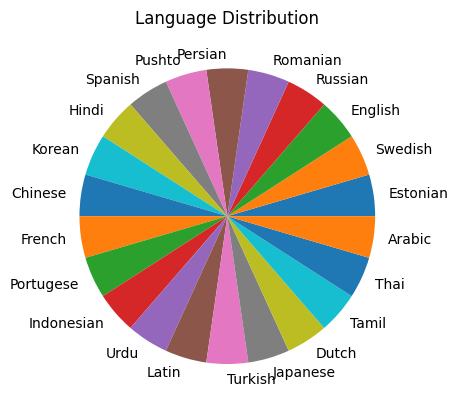

In [ ]:
# Pie chart of the language distribution for visualization 
plt.pie(language_counts.values, labels=language_counts.index)
plt.title('Language Distribution')
plt.show()

## Data Preparation

Next, the team created a function for data preparation so that any subset of data being used from the WiLi-2018 dataset can be trained easily. Data preparation mainly involved converting the text data to numberical values using techniques such as label encoding, and count vectorization. Label encoding was used instead of one hot encoding as it would have increased the size of the data further, resulting into more problems that were faced due to hardware limitations when training the model. Count vectorizer is a common technique to use when working with text data. It counts the frequency of each word in the data and creates a column (feature) for that word.

In [ ]:
#Convert text data to numerical
def data_preparation(dataset, label_col, text_col):

  #Extracting columns from dataset
  x = dataset[text_col]
  y = dataset[label_col]

  #Categorial Label Encoding - Convert text labels to numerical labels for the purposes of training 
  le = LabelEncoder()
  y = le.fit_transform(y)
  print("Labels:", np.unique(y))

  #Filter text to remove any symbols and numbers - Common symbols and numbers shared in languages reduces accuracy of the model
  filtered_text_list = []
  for text in x:
    text = re.sub(r'[0-9,"?!:;()@#$%^*~`]', ' ', text)
    text = text.lower()
    filtered_text_list.append(text)

  #Convert text to numerical form on the basis of frequency
  cv = CountVectorizer()
  x = cv.fit_transform(filtered_text_list).toarray()
  print("Shape of text data:", x.shape)

  #Split the dataset into training and test set
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

  return x_train, x_test, y_train, y_test, le, cv


## Model Training and Selection

In the next step, the team did some research regarding models that perform well in text classification, and shortlisted the models that are trained below. In this step, the team first splits the dataset into a training set and testing test which will be used in training the following models. The team has attempted fine tune these models to achieve better performance.

In [ ]:
#Get prepared training and testing sets
x_train, x_test, y_train, y_test, le, cv = data_preparation(dataset=dataset, label_col="language", text_col="Text")

Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Shape of text data: (5500, 103277)


### Naive Bayes

In [ ]:
#Train model using training set
model = MultinomialNB()
model.fit(x_train, y_train)

#Prediction on test set
prediction = model.predict(x_test)

#Testing accuracy of predictions on test set
accuracy = accuracy_score(y_test, prediction)
confusion_m = confusion_matrix(y_test, prediction)
print("The accuracy is :", accuracy)

The accuracy is : 0.9402597402597402


In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       0.94      0.42      0.58        79
           2       0.99      0.99      0.99        67
           3       0.62      1.00      0.77        71
           4       0.97      0.97      0.97        64
           5       0.94      0.98      0.96        63
           6       1.00      0.97      0.99        77
           7       1.00      0.99      0.99        67
           8       0.60      0.82      0.69        61
           9       1.00      0.98      0.99        66
          10       1.00      0.91      0.95        69
          11       1.00      1.00      1.00        80
          12       0.98      0.94      0.96        68
          13       1.00      0.87      0.93        79
          14       1.00      0.96      0.98        54
          15       0.99      0.99      0.99        75
          16       0.98      1.00      0.99        81
          17       0.97    

#### Explaination and Reason

Naïve Bayes is a probabilistic classifier based on Bayes theorem [1]. It relies on making common assumptions on the independent features available to complete its classification [1]. The theorem is denoted by the formula in the image below.

![Naive Bayes](images/naive_bayes_icon.png)

Various classifiers make different assumptions in accordance with the distributions they implement [1]. The source code above uses a multinomial distribution, which is among the popular distributions used for Language Detection, key phrase extraction, and medical diagnosis problems [1]. Moreover, Naïve Bayes is also an efficient and fast model especially when compared with more matured methods such as Support Vector Machine [1].

### SVM

In [ ]:
#Train model using training set
model =  LinearSVC(multi_class='ovr')
model.fit(x_train, y_train)

#Prediction on test set
prediction = model.predict(x_test)

#Testing accuracy of predictions on test set
accuracy = accuracy_score(y_test, prediction)
confusion_m = confusion_matrix(y_test, prediction)
print("The accuracy is :", accuracy)

The accuracy is : 0.9371212121212121


In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.82      0.32      0.46        57
           2       1.00      0.98      0.99        63
           3       0.85      0.96      0.90        54
           4       1.00      0.90      0.95        62
           5       1.00      1.00      1.00        61
           6       1.00      0.99      0.99        69
           7       1.00      1.00      1.00        62
           8       0.44      0.96      0.60        51
           9       1.00      0.95      0.98        63
          10       0.94      0.92      0.93        52
          11       1.00      0.97      0.99        78
          12       0.98      1.00      0.99        62
          13       1.00      0.96      0.98        56
          14       1.00      0.97      0.98        63
          15       0.97      0.92      0.94        64
          16       0.98      0.98      0.98        54
          17       1.00    

#### Explanation and Reason
Support Vector Machines (SVM) is a popular machine learning algorithm that has been used in various classification tasks. SVM works by finding the optimal hyperplane that separates the different classes in the dataset. In the case of language dtection, the classes represent different langages and the hyperplane separates the data based on the language. SVM is a good tactic to use for this scenario because it can handle and separte non-linearly separable data by mapping the data to a higher degree.

<img src="https://drive.google.com/uc?id=1JEO8CICl5xCwePWgWgmF2yPKctYXqAJT" width="250" height="250">[7]


### Random Forest Classifier

In [ ]:
#Train model using training set
model = RandomForestClassifier(n_estimators=150)
model.fit(x_train, y_train)

#Prediction on test set
prediction = model.predict(x_test)

#Testing accuracy of predictions on test set
accuracy = accuracy_score(y_test, prediction)
confusion_m = confusion_matrix(y_test, prediction)
print("The accuracy is :", accuracy)

The accuracy is : 0.9378787878787879


In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       0.83      0.26      0.40        57
           2       1.00      1.00      1.00        63
           3       0.82      1.00      0.90        54
           4       1.00      0.92      0.96        62
           5       1.00      1.00      1.00        61
           6       1.00      0.99      0.99        69
           7       0.98      1.00      0.99        62
           8       0.44      0.94      0.60        51
           9       1.00      0.90      0.95        63
          10       0.98      0.92      0.95        52
          11       1.00      0.99      0.99        78
          12       0.98      0.98      0.98        62
          13       1.00      0.96      0.98        56
          14       1.00      0.97      0.98        63
          15       0.97      0.91      0.94        64
          16       0.98      0.98      0.98        54
          17       1.00    

#### Explaination and Reason

Random Forest Classifiers are an ensemble learning method [9]. It is a culmination of various classification trees working in tandem to provide the most accurate prediction the model can provide [10]. Due to each sub tree consisting of its own individual classification trees, we can depend on the voting layer to provide the most accurate results [10].  The image below illustrates the internal process of the Random Forest Classifier used.

<img src="https://drive.google.com/uc?id=1OXWlj4qKq_pg0CByeOOgluJm4g9f-6Z3" > [10]

Our source code performs it prediction with an estimation of 150 trees, no max leaf node, and no maximum jobs. We used 150 trees due to the hardware limitations we encountered but compensated by placing no restrictions on the number of leaf nodes and jobs performed.


### Logistic Regressor

In [ ]:
#Train model using training set
model = LogisticRegression()
model.fit(x_train, y_train)

#Prediction on test set
prediction = model.predict(x_test)

#Testing accuracy of predictions on test set
accuracy = accuracy_score(y_test, prediction)
confusion_m = confusion_matrix(y_test, prediction)
print("The accuracy is :", accuracy)

The accuracy is : 0.9145454545454546


In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        45
           1       0.71      0.27      0.39        45
           2       1.00      0.98      0.99        63
           3       0.84      1.00      0.92        49
           4       1.00      0.94      0.97        47
           5       0.98      0.98      0.98        51
           6       1.00      0.98      0.99        57
           7       1.00      1.00      1.00        51
           8       0.37      0.94      0.53        47
           9       1.00      0.79      0.88        53
          10       0.93      0.93      0.93        45
          11       1.00      0.92      0.96        52
          12       1.00      0.98      0.99        42
          13       1.00      0.90      0.95        51
          14       1.00      0.98      0.99        50
          15       1.00      0.87      0.93        61
          16       1.00      0.92      0.96        36
          17       1.00    

#### Explanation and Reason

Logistic regression is a popular and effective machine learning algorithm for binary classification tasks. While it is true that logistic regression is a binary classification algorithm, it can still be used for multiclass classification problems like language detection. There are several approaches to extending logistic regression for multiclass classification, such as one-vs-all (OVA) and multinomial logistic regression. Logistic regression makess sense in this use case because the model is simple and interpretable. Logistic regression can also handle both linear and non-linear relationships between the input features and the target variable, making it suitable for modeling complex patterns in text data.




## Prediction

In [ ]:
#Prepare data and make prediction using trained model
def language_predict(text):
    #Data preparation
    text = cv.transform([text]).toarray() 
    #Prediction
    prediction = model.predict(text)
    #Convert numerical to text labels
    language_label = le.inverse_transform(prediction)
    print("The langauge is in",language_label[0])

In [ ]:
language_predict("Today is going to be very busy because I have a lot of things to do.")#English

The langauge is in English


In [ ]:
language_predict("आज का दिन काफी व्यस्त रहने वाला है क्योंकि मेरे पास करने के लिए बहुत सी चीजें हैं")#Hindi

The langauge is in Hindi


In [ ]:
language_predict("Aujourd'hui va être très chargé car j'ai beaucoup de choses à faire")#French

The langauge is in French


In [ ]:
language_predict("اليوم سيكون مشغولاً للغاية لأن لدي الكثير من الأشياء لأفعلها")#Arabic

The langauge is in Arabic


In [ ]:
language_predict("آج کا دن بہت مصروف ہو گا کیونکہ میرے پاس بہت سارے کام ہیں۔")#Urdu

The langauge is in Urdu


In [ ]:
language_predict("Hoje vai ser muito corrido porque tenho muitas coisas para fazer")#Portuguese

The langauge is in Portugese


In [ ]:
language_predict("امروز خیلی شلوغ خواهد بود چون کارهای زیادی برای انجام دادن دارم")#Persian

The langauge is in Persian


In [ ]:
language_predict("نن ورځ ډیر بوخت یم ځکه زه ډیر څه لرم")#Pushto

The langauge is in Pushto


In [ ]:
language_predict("Hoy va a estar muy ocupada porque tengo muchas cosas que hacer")#Spanish

The langauge is in Spanish


In [ ]:
language_predict("오늘은 할 일이 많아서 매우 바쁠 것 같아요")#Korean

The langauge is in Korean


# Results

In this project, we trained different models such as Naive Bayes, Support Vector Machines (SVM), Random Forest Classifier, and finally a Logistic Regressor. After training all these models, we observed that the Naive Bayes model worked best with the dataset used. Accuracy was the measure used to identify which model works best for this task. Accuracy is calculated using how many labels were predicted correctly by the model from the test set. This measure helps us identify which model is the most accurate at predicting the correct language. The multinomial Naive Bayes model, provided the highest accuracy of 94%. It was closely followed by the SVM model, and the Random Forest Classfier at 93.7% percent accuracy. Lasly, we have the logistic regressor at 91.4%. Naive Bayes is an extremely popular algorithm in Natural Language Processing (NLP) and generally provides the best results in similar projects. In the confusion matrix below, we can observe that the Naive Bayes model performs really well in the classification of most languages. This result can be further improved by using more samples to train the models however due to restrictions presented by the hardware the team was using for the project, we were unable to provide more data despite the data being available.




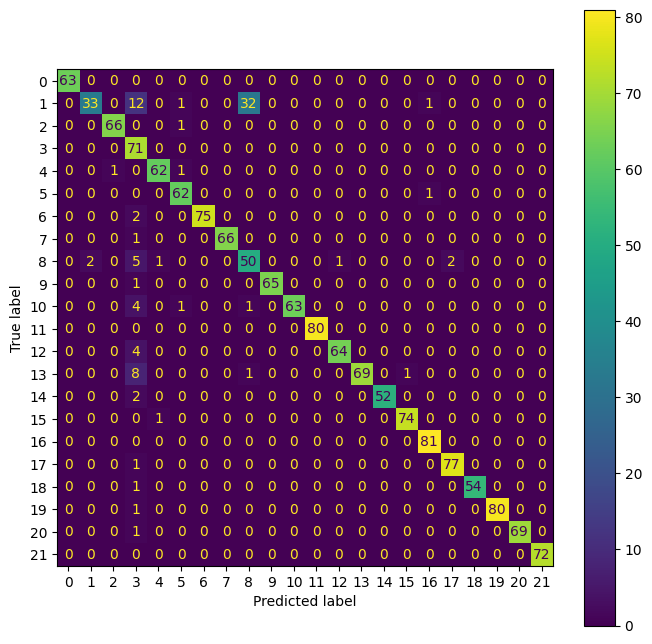

In [ ]:
#Naive Bayes Model Confusion Matrix
fig, ax = plt.subplots(figsize=(8,8))
multinomalNB = ConfusionMatrixDisplay(
    confusion_matrix(y_test, prediction),
    display_labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],
    )
multinomalNB.plot(ax=ax)
plt.show()

# Challenges
Hardware limitation was the biggest challenge that the team faced while working on this project. The team had aspirations to train a model that could have detected hundreds of different languages in text however, due to the fact that machine learning models require numerical data to train, the size of the data became too large as text has to be converted to frequency of words which increases the shape of the dataset drastically. This resulted in the team not being able to work the dataset that they initially wanted to. The workspaces available to the team had a maximum of 16GB RAM, however the data required much more RAM to first convert the text to numerical values. Even after the conversion, the team would need more RAM to train all the various models. Lack of hardware resources prevented the team from achieving an advanced language detection model. The team attempted to use a subset of the data and also had further remove samples for each of labels to train models within the hardware restrictions.

# Conclusion

In conclusion, we have developed a language detection model using machine learning algorithms, which has been trained on a large dataset of text data from various languages. We have evaluated the effectiveness of various feature engineering techniques and analyzed the performance of different machine learning algorithms. Our model can accurately predict the language of a given input text, making it a useful tool for various applications, such as language translation, content analysis, and information retrieval. One thing to note is that one of the limitations we encountered during the development of this language detection model was the hardware constraints, specifically the RAM and memory capacity of the machines or virtual machines used for training and testing. We bypassed this limitation by using a slightly smaller data set, still very large to avoid the machine from crashing. In the end our language detection model achieved promising results, demonstrating the potential of machine learning algorithms in language detection tasks.

# Contribution Matrix

<img src="https://drive.google.com/uc?id=114cwWvm2ASHPMknpzXGY9UIfrly7Syhw" width="600" height="260">

# References

[1] "What is Natural Language Processing? | IBM,"   Ibm, https://www.ibm.com/topics/natural-language-processing (accessed Feb. 05, 2023).

[2] S. Ayodeji, "Using machine learning for language detection | by Shittu Olumide Ayodeji | Heartbeat,"   Heartbeat, Nov. 7, 2022. https://heartbeat.comet.ml/using-machine-learning-for-language-detection-517fa6e68f22 (accessed Feb. 05, 2023).


[3] “Google’s Compact Language Detector 3,” docs.ropensci.org. https://docs.ropensci.org/cld3/ (accessed Apr. 01, 2023).
‌

[4] “Language identification · fastText,” fasttext.cc. https://fasttext.cc/docs/en/language-identification.html (accessed Feb. 08, 2023).
‌

[5] “Amazon Comprehend - Natural Language Processing (NLP) and Machine Learning (ML),” Amazon Web Services, Inc., 2019. https://aws.amazon.com/comprehend/(accessed Feb. 08, 2023).

[6] “Text Analytics | Microsoft Azure,” azure.microsoft.com. https://azure.microsoft.com/en-us/products/cognitive-services/text-analytics (accessed Feb. 08, 2023).
‌

[7] “Support Vector Machine,” Support Vector Machine - an overview | ScienceDirect Topics. https://www.sciencedirect.com/topics/computer-science/support-vector-machine. (accessed: Apr. 01, 2023).

[8] S. Xu, "Bayesian Naïve Bayes classifiers to text classification," Journal of Information Science, vol. 44, no. 1, pp. 48-59, February 2018. 
[9] D. K. A. Hafeez, "Decision Trees," Dr. Khalid A. Hafeez, Oshawa, 2023.
[10] L. Fraiwan, K. Lweesy, N. Khasawneh, H. Wenz and H. Dickhaus, "Automated sleep stage identification system based on time–frequency analysis of a single EEG channel and random forest classifier," Computer Methods and Programs in Biomedicine, vol. 108, no. 1, pp. 10-19, October 2012. 
